<h1 align="center">Bolometric Corrections</h1>

### "Bolometric correction methods use the bolometric lightcurves of well-observed SNEe (by integrating the SED) to find correlations between an observable quantity such as color and the bolometric correction BC" Lusk et al $\href{https://arxiv.org/abs/1608.08631}{2016}$

Bolometric corrections are defined with the following two expressions

$$
BC_{\lambda} = m_{bol} - m_{\lambda}\\
$$
Where 
$$
BC_{\lambda} = \sum_{k=0}^{n} c_k (m_x - m_y)^k
$$

The bolometric corrections that we will use on KSP ZN-7090 will be the ones from the following two papers , Martinez et al. $\href{https://ui.adsabs.harvard.edu/abs/2022A%26A...660A..40M/abstract}{2022}$ and Layman et al. $\href{https://ui.adsabs.harvard.edu/abs/2014MNRAS.437.3848L/abstract}{2014}$, where they study a wide group of SNe measured in a variety of bands, which allowed them to construct integrate their SED over a range of wavelengths and obtain their bolometric light curves. After this they looked at the correlation beteen the colors of the SNe and the BC. Here they present their correction in seperate phases for the SNe. All the correction presented by both papers are polynomials of degree 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import table

In [2]:
# Read data as a Panda data frame for easier handling
KSP_data = pd.read_csv("KSP-ZN7090_LC_20220309_correct.csv")

In [3]:
KSP_data

,date,date[MJD],date_err,telescope,band,M_0,M_0_err,M_0_lim,M_C,M_C_err,M_C_lim,M_E,M_E_err,M_E_lim,binned,binned_images
0,2020-10-06 19:08:45.000001,59128.797743,0.202431,A/S,V,NaN,NaN,21.839,NaN,NaN,21.839,NaN,NaN,21.772,Y,201006_1239.A/201006_2018.S/201006_2116.S/2010...
1,2020-10-06 19:10:45.000000,59128.799132,0.202431,A/S,I,NaN,NaN,21.944,NaN,NaN,21.944,NaN,NaN,21.902,Y,201006_1241.A/201006_2020.S/201006_2118.S/2010...
2,2020-10-06 21:16:40.000000,59128.886574,0.043056,S,B,23.035,0.506,22.247,23.031,1.240,22.035,22.940,1.240,21.944,Y,201006_2016.S/201006_2114.S/201006_2220.S
3,2020-10-07 21:18:00.000000,59129.887500,0.049653,S,B,25.710,4.268,22.597,26.831,5.908,22.385,26.740,5.908,22.294,Y,201007_2009.S/201007_2113.S/201007_2232.S
4,2020-10-07 21:20:00.000000,59129.888889,0.049653,S,V,NaN,NaN,22.232,NaN,NaN,22.232,NaN,NaN,22.165,Y,201007_2011.S/201007_2115.S/201007_2234.S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2020-12-09 10:42:00.000000,59192.445833,0.000000,A,V,20.713,0.099,21.712,20.713,0.099,21.712,20.646,0.099,21.645,N,NaN
130,2020-12-09 10:44:00.000000,59192.447222,0.000000,A,I,20.305,0.126,21.045,20.305,0.126,21.045,20.263,0.126,21.003,N,NaN
131,2020-12-10 01:16:00.000000,59193.052778,0.000000,C,B,21.277,0.087,22.449,21.180,0.124,22.237,21.089,0.124,22.146,N,NaN
132,2020-12-10 01:18:00.000000,59193.054167,0.000000,C,V,20.757,0.076,22.085,20.757,0.076,22.085,20.690,0.076,22.018,N,NaN


In [4]:
# Store dates in local variable
dates = np.array(KSP_data['date[MJD]'],dtype='float')

# Look at the bands of each individual measurement
bands = KSP_data["band"]
loc_B = np.where(bands=="B")
loc_V = np.where(bands=="V")
loc_I = np.where(bands=='I')

# Index the corrected magnitude arrays on the bands of interest
all_mags = np.array(KSP_data["M_E"])
all_mag_err = np.array(KSP_data["M_E_err"])
B_mags = all_mags[loc_B]
B_mags_err = all_mag_err[loc_B]
V_mags = all_mags[loc_V]
V_mags_err = all_mag_err[loc_V]
I_mags = all_mags[loc_I]
I_mags_err = all_mag_err[loc_I]

# Index dates for respective bands and substract by date of first observation
B_dates = dates[loc_B] - dates[0]
V_dates = dates[loc_V] - dates[0]
I_dates = dates[loc_I] - dates[0]

In [34]:
# Specify Plotting styles
from matplotlib.ticker import MultipleLocator

style = 'default'
tdir = 'in'

major=5
minor=3

font = 'serif'

plt.style.use(style)

plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir

plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

plt.rcParams['font.family'] = font

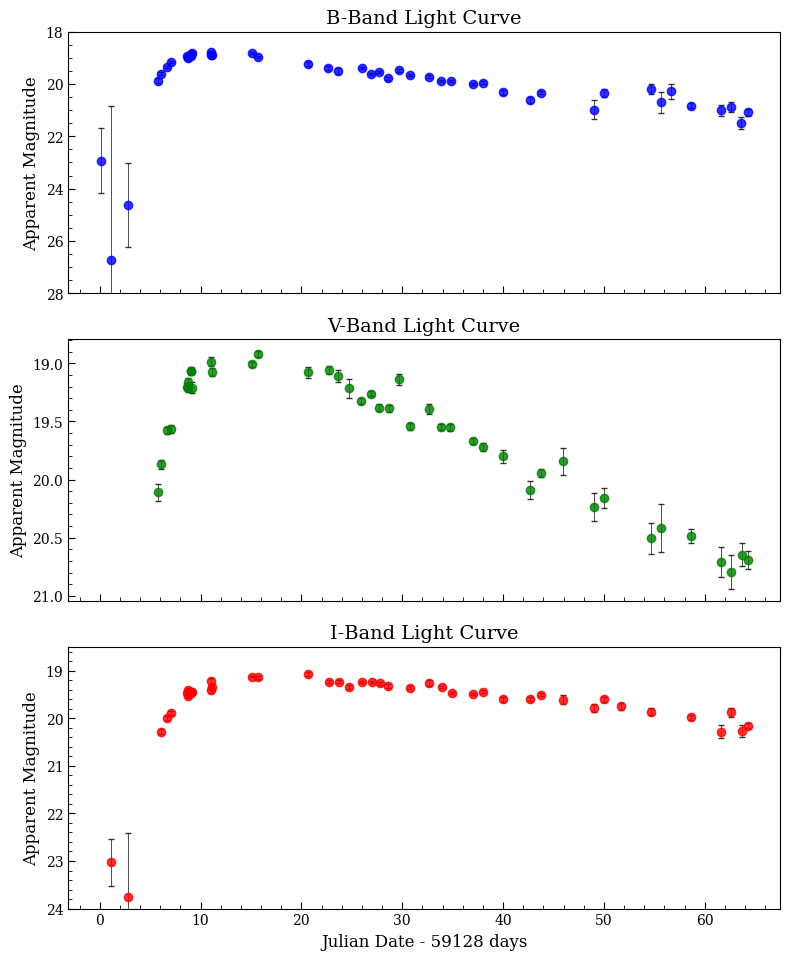

In [36]:
# Plot light curves
gr = 1.618033988749
scale = 6
fig, (a0,a1,a2) = plt.subplots(figsize=(8,gr*scale),
                               nrows=3,sharex=True)
a0.set_title("B-Band Light Curve",fontsize=14)
a0.errorbar(B_dates,B_mags,yerr=B_mags_err,fmt='bo',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8)
a0.set_ylabel("Apparent Magnitude",fontsize=12)
a0.invert_yaxis()
a0.set_ylim([28,18])
a0.tick_params(axis='y', labelsize=10)
a0.yaxis.set_minor_locator(MultipleLocator(.5))

a1.set_title("V-Band Light Curve",fontsize=14)
a1.errorbar(V_dates,V_mags,yerr=V_mags_err,fmt='go',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8)
a1.set_ylabel("Apparent Magnitude",fontsize=12)
a1.invert_yaxis()
a1.tick_params(axis='y', labelsize=10)
a1.yaxis.set_minor_locator(MultipleLocator(.1))

a2.set_title("I-Band Light Curve",fontsize=14)
a2.errorbar(I_dates,I_mags,yerr=I_mags_err,fmt='ro',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8)
a2.set_ylabel("Apparent Magnitude",fontsize=12)
a2.invert_yaxis()
a2.set_xlabel(f"Julian Date - {int(dates[0])} days",fontsize=12)
a2.tick_params(axis='both', labelsize=10)
a2.set_ylim([24,18.5])
a2.yaxis.set_minor_locator(MultipleLocator(.2))
a2.xaxis.set_minor_locator(MultipleLocator(2))

plt.tight_layout()
plt.savefig("Corrected LCs.png")
plt.show()

### Interpolation
In order to apply bolometric corrections we need to ensure magnitudes are taken in the same epoch, which means we need to interpolate either the B-band light curve or the V-band light curve in order to match the epochs. For the interpolation we will be using a linear and a cubic spline interpolation from the scipy.interpolate package. We then later plan on comparing the bolometric light curves generated by each interpolation method.

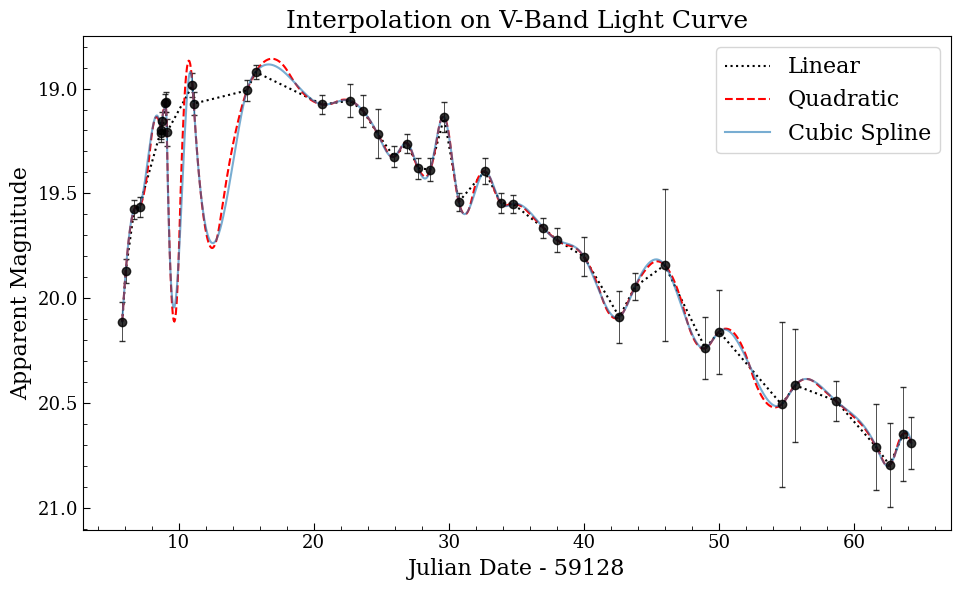

In [50]:
from scipy.interpolate import CubicSpline,interp1d,PPoly,barycentric_interpolate
# Generate domains for interpolation 
N = 1000
dummy_domain = np.linspace(V_dates[3],V_dates[-1],N)

# Try different methods of interpolation
CS = CubicSpline(V_dates[3:],V_mags[3:])
LI = interp1d(V_dates[3:],V_mags[3:])
QU = interp1d(V_dates[3:],V_mags[3:],kind='quadratic')


fig, a0 = plt.subplots(figsize=(scale*gr,scale),ncols=1)

a0.errorbar(V_dates,V_mags,yerr=B_mags_err,fmt='ko',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8)
a0.plot(dummy_domain,LI(dummy_domain),label="Linear",ls=':',c='k')
a0.plot(dummy_domain,QU(dummy_domain),label="Quadratic",c='red',ls='--')
a0.plot(dummy_domain,CS(dummy_domain),label="Cubic Spline",alpha=0.6)
a0.invert_yaxis()
a0.set_title("Interpolation on V-Band Light Curve",fontsize=18)
a0.set_xlabel(f"Julian Date - {int(dates[0])}",fontsize=16)
a0.set_ylabel("Apparent Magnitude",fontsize=16)
a0.tick_params(axis='both', labelsize=13)
a0.legend(prop={'size':16})
a0.yaxis.set_minor_locator(MultipleLocator(.1))
a0.xaxis.set_minor_locator(MultipleLocator(2))
plt.tight_layout()
plt.savefig("Interpolated LC.png")
plt.show()

Because we suspect ZN-7090 is a Type II-L SNe then we expect the light curve post peak would follow a linear decay, therefore, we see the best interpolation method that will highlight this linear decay is a linear interpolation method as this method does not add any sort of non-existing curvature past the peak. Furthermore, the linear interpolation capture the SBO phase pretty well and capture the curvature of the peak magnitude better than any of the ther methods of interpolation.

<h2 align="center"> Applying Martinez et al. $\href{https://ui.adsabs.harvard.edu/abs/2022A%26A...660A..40M/abstract}{2022}$ bolometric corrections <h2>

We will be using bolometric correction specific to the cooling phase because KSP-ZN7090 does not exhibit a plateau phase nor has entered a radiactive tail phase yet. The bolometric correction presented in this paper consists of a fourth order polynomial with a standard deviation of $\sigma = 0.12 $ which is explicitly written as follows.

$$
BC_{B,cool} = -0.740 + 4.472(B-V) - 9.637(B-V)^2 + 9.075(B-V)^3 - 3.290(B-V)^4
$$

Recall bolometric correction are defined as follows.

$$
BC_{B} = m_{bol} - m_{B}\\
m_{bol} = BC_{B} + m_{B}
$$

In [39]:
def Martinez_cooling(Bmags,Vmags,BmagsErr,VmagsErr):
    
    '''Returns the bolometric magntiudes, their respective uncertainties and the BC given Martinez et al.
    bolometric corrections for a SNe in its cooling phase. Its input must be two arrays, B and V magnitudes
    respectively and their uncertainties. '''
    
    from uncertainties import ufloat,unumpy
    
    # Initialize the coefficients for the BC with respective uncertainties
    sigma = 0.12
    c0, c1, c2, c3, c4 = ufloat(-0.740,sigma), ufloat(4.472,sigma), ufloat(-9.637,sigma),\
    ufloat(9.075,sigma), ufloat(-3.290,sigma)
    # Define BC with coefficients
    BC  = lambda x: c0 + c1*x + c2*x**2 + c3*x**3 + c4*x**4
    # Turn magntiude arrays into desireable data type for uncertainy handling
    Bmags = unumpy.uarray(Bmags,BmagsErr)
    Vmags = unumpy.uarray(Vmags,BmagsErr)
    color = Bmags - Vmags
    mbol = BC(color)+Bmags
    return(unumpy.nominal_values(mbol),unumpy.std_devs(mbol),BC(color),color)


In [40]:
# Compute the apparent bolometric magnitudes
mbol, mbol_err, Correction, Colour = Martinez_cooling(B_mags,V_mags,B_mags_err,V_mags_err)

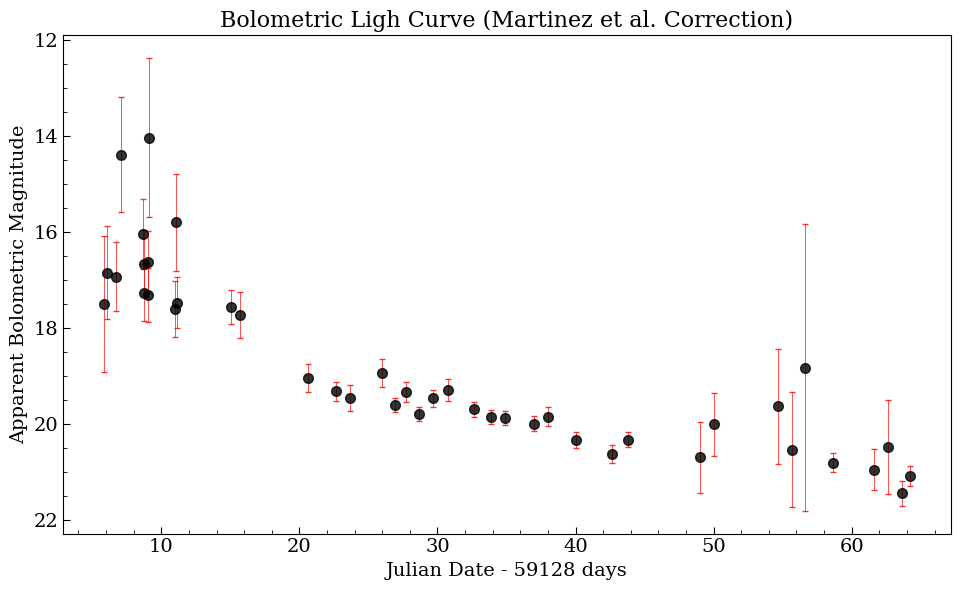

In [43]:
# Plot the bolometric light curve
fig, (a0) = plt.subplots(figsize=(gr*scale,scale),ncols=1)
a0.set_title("Bolometric Ligh Curve (Martinez et al. Correction)",fontsize=16)
a0.errorbar(B_dates,mbol,yerr=mbol_err,fmt="ko",ecolor='r',capsize=2,elinewidth=0.6,alpha=0.8,markersize=7)
a0.invert_yaxis()
a0.set_xlabel(f"Julian Date - {int(dates[0])} days",fontsize=14)
a0.set_ylabel("Apparent Bolometric Magnitude",fontsize=14)
a0.tick_params(axis='both', labelsize=14)
a0.yaxis.set_minor_locator(MultipleLocator(.5))
a0.xaxis.set_minor_locator(MultipleLocator(2))
plt.tight_layout()

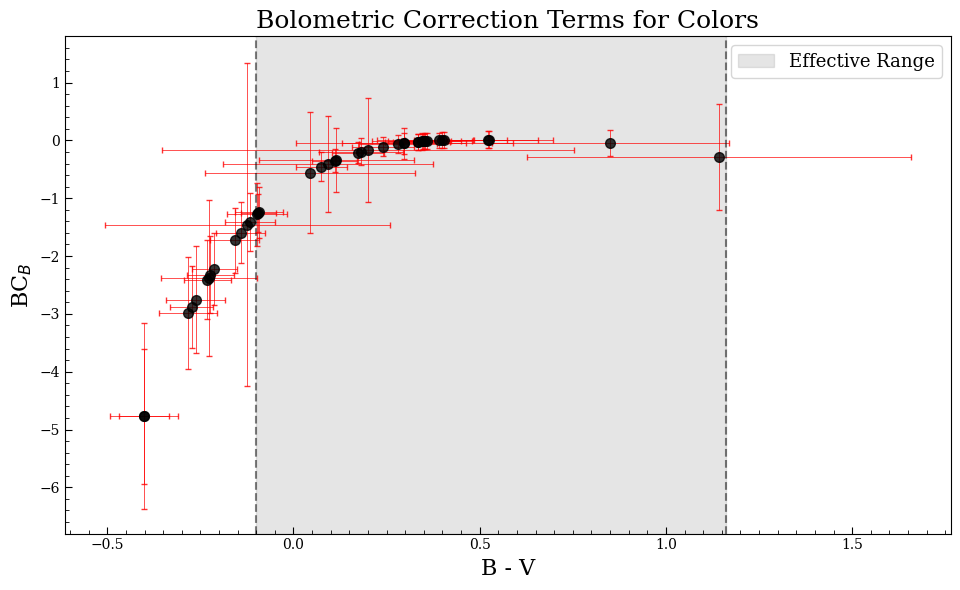

In [72]:
from uncertainties import ufloat,unumpy
# Look at the bolometric correction terms as a function of color
BC_val = unumpy.nominal_values(Correction)
BC_err = unumpy.std_devs(Correction)
C_val = unumpy.nominal_values(Colour)
C_err = unumpy.std_devs(Colour)

fig, a0 = plt.subplots(figsize=(gr*scale,scale),ncols=1)
a0.errorbar(unumpy.nominal_values(Colour),unumpy.nominal_values(Correction),xerr=unumpy.std_devs(Colour),\
            yerr=unumpy.std_devs(Correction),fmt="ko",ecolor='r',elinewidth=0.6,alpha=0.8,markersize=7,capsize=2)
a0.set_title("Bolometric Correction Terms for Colors",fontsize=18)
a0.set_xlabel("B - V",fontsize=16)
a0.set_ylabel(r"BC$_{B}$",fontsize=16)
a0.yaxis.set_minor_locator(MultipleLocator(.2))
a0.xaxis.set_minor_locator(MultipleLocator(0.05))
a0.vlines([-0.1,1.16],ymin=-7,ymax=2,ls='--',colors='k',alpha=0.5)
a0.axvspan(-0.1, 1.16 , alpha=0.2, color='gray',label="Effective Range")
a0.set_ylim([-6.8,1.8])
a0.legend(prop={"size":13})
plt.tight_layout()
plt.show()